Q R S T U V W X Y Z

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

from sklearn.model_selection import train_test_split

import numpy as np

from google.colab import drive
from matplotlib import pyplot as plt

%matplotlib inline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Visto che il dataset è in formato .obj utilizzo il modulo **pickle** di python per importarlo.

Il modulo pickle implementa un algoritmo per trasformare un oggetto arbitrario Python in un una serie di byte. 
Questo processo viene anche detto serializzazione dell'oggetto). Il flusso di byte che rappresenta l'oggetto può successivamente ricostruito per creare un nuovo oggetto con le stesse caratteristiche.

In [0]:
import pickle 

x_train = pickle.load(open("drive/My Drive/Colab Notebooks/DL-Autoencoders-experiments-on-letters/datasets/x_train.obj","rb"))
y_train = pickle.load(open("drive/My Drive/Colab Notebooks/DL-Autoencoders-experiments-on-letters/datasets/y_train.obj","rb"))
x_test = pickle.load(open("drive/My Drive/Colab Notebooks/DL-Autoencoders-experiments-on-letters/datasets/x_test.obj","rb"))

## Analisi del dataset

In [5]:
x_train.shape

(14000, 28, 28)

In [6]:
y_train.shape

(14000,)

In [7]:
x_test.shape


(8800, 28, 28)

Quindi ho:

*   **14.0000** matrici 28x28 che sono i dati di **train**
*   **8.800** matrici 28x28 che sono i dati di **test**



### Provo a stampare le prime 10 lettere del train set e confrontare con il target

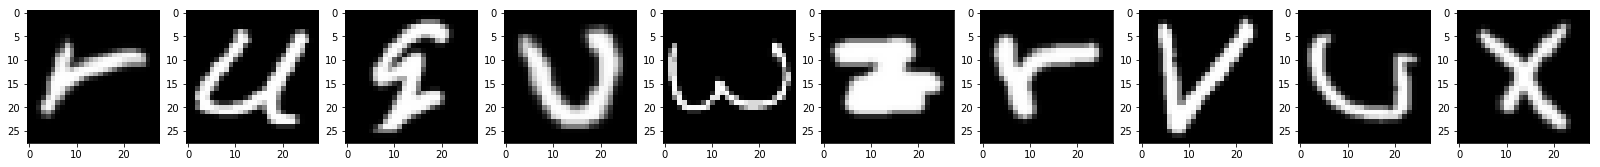

In [8]:
n = 10
plt.figure(figsize=(28, 28))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
 

**Del train set ho anche il valore del target: che target hanno quelle che ho appena stampato?**

In [9]:
#il target è individuato dal numero della lettera (da 16 a 26)
#Quindi questa funzione mappa il numero della lettera al simbolo della lettera stessa, così mi è facile riconoscerle
def letter_number(n):
  letters=["Q","R","S","T","U","V","W","X","Y","Z"]
  n=n-17
  return letters[n]

#Stampo il valore target delle lettere sopra, seguite dal corrispondente letterale
n = 10
for i in range(n):
  print(y_train[i], letter_number(y_train[i]))
 

18 R
21 U
17 Q
21 U
23 W
26 Z
18 R
22 V
21 U
24 X


Confrontanto a occhio **corrispondono**.

Ora ho un idea precisa di come sia composto il DS e posso iniziare a lavorarci.

## Reshape dei dati
Visto che il modello non può lavorare con le matrici trasformo la matrice 28z28 in un array da 784 (28*28) valori

In [10]:
print("Shape prima del reshape:")
print(x_train.shape, "Train Set")
print(x_test.shape, " Test Set\n")


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Shape dopo il reshape:")
print(x_train.shape, "Train Set")
print(x_test.shape, " Test Set")

Shape prima del reshape:
(14000, 28, 28) Train Set
(8800, 28, 28)  Test Set

Shape dopo il reshape:
(14000, 784) Train Set
(8800, 784)  Test Set


Ho ridotto di una dimensione

## Creo il Validation Set



In [0]:
train_data, val_data, train_target, val_target= train_test_split(x_train, x_train, test_size=0.15, random_state=42)


In [12]:
print("-> Original Train Set Shape:")
print(x_train.shape)
print(x_train.shape)
print("\n---- VALIDATION SPLIT ----\n")
print("-> Train Set Shape:")
print(train_data.shape)
print(train_target.shape)
print("-> Validation Set Shape:")
print(val_data.shape)
print(val_target.shape)


-> Original Train Set Shape:
(14000, 784)
(14000, 784)

---- VALIDATION SPLIT ----

-> Train Set Shape:
(11900, 784)
(11900, 784)
-> Validation Set Shape:
(2100, 784)
(2100, 784)


## Definisco il modello di Encoding